# The data in this notebook was generated elsewhere as noted. This notebook is purely for quickly iterating plot syles for publication.

## 50k random image pairs

These data were generated in `cas9-similarity-search/notebooks/03_simulations/00_simulate_pairs.ipynb` and `primo-similarity-search/notebooks/03_simulations/00_simulate_pairs.ipynb`.

In [41]:
%pylab notebook

# Run on CPU not GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'f', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
# 20 nt Cas9 model data
cas20_recall_data = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9828034393121375, 0.9824035192961408, 0.982003599280144, 0.9816036792641472, 0.981003799240152, 0.981003799240152, 0.9802039592081584, 0.9798040391921615, 0.979004199160168, 0.9734053189362127, 0.9652069586082783, 0.9634073185362927, 0.9500099980003999, 0.9462107578484303, 0.943011397720456, 0.936612677464507, 0.9206158768246351, 0.9104179164167167, 0.9034193161367726, 0.8740251949610078, 0.8604279144171165, 0.8452309538092382, 0.8350329934013198, 0.8280343931213757, 0.8262347530493901, 0.8182363527294542, 0.8170365926814637, 0.8120375924815036, 0.8090381923615277, 0.8060387922415517, 0.8036392721455708, 0.7986402719456108, 0.793241351729654, 0.7888422315536893, 0.7846430713857229, 0.7736452709458108, 0.7640471905618876, 0.7596480703859229, 0.7506498700259948, 0.7434513097380524, 0.734253149370126, 0.7306538692261547, 0.7196560687862428, 0.7110577884423115, 0.6986602679464107, 0.6696660667866426, 0.6526694661067787, 0.6462707458508299, 0.6192761447710458, 0.5882823435312937, 0.5852829434113177, 0.5712857428514297, 0.5702859428114377, 0.55248950209958, 0.5452909418116376, 0.5358928214357128, 0.5318936212757448, 0.5028994201159768, 0.5000999800039992, 0.47570485902819437, 0.47230553889222154, 0.45310937812437513, 0.4485102979404119, 0.43951209758048393, 0.4325134973005399, 0.42291541691661666, 0.4195160967806439, 0.39232153569286143, 0.3769246150769846, 0.36012797440511896, 0.3311337732453509, 0.2695460907818436, 0.26494701059788045, 0.0]
cas20_false_positive_data = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8993798759751951, 0.8973794758951791, 0.8907781556311263, 0.8875775155031006, 0.885377075415083, 0.8815763152630526, 0.8775755151030206, 0.8721744348869774, 0.8637727545509102, 0.8441688337667533, 0.8251650330066013, 0.8151630326065213, 0.7975595119023805, 0.7873574714942989, 0.7755551110222044, 0.7665533106621324, 0.734746949389878, 0.7193438687737548, 0.6859371874374875, 0.6265253050610122, 0.6081216243248649, 0.5807161432286457, 0.5691138227645529, 0.5561112222444489, 0.5487097419483897, 0.5383076615323065, 0.5299059811962392, 0.5241048209641929, 0.5207041408281656, 0.5113022604520904, 0.5053010602120425, 0.4926985397079416, 0.484496899379876, 0.4690938187637527, 0.4566913382676535, 0.4424884976995399, 0.42288457691538306, 0.41168233646729346, 0.39927985597119425, 0.381876375275055, 0.3636727345469094, 0.356871374274855, 0.3416683336667333, 0.3348669733946789, 0.3178635727145429, 0.2994598919783957, 0.28525705141028207, 0.27905581116223244, 0.25745149029805964, 0.24904980996199239, 0.2444488897779556, 0.2354470894178836, 0.23104620924184838, 0.22624524904980997, 0.22464492898579716, 0.22024404880976195, 0.21764352870574113, 0.20804160832166432, 0.20384076815363072, 0.19863972794558912, 0.19483896779355872, 0.1846369273854771, 0.17863572714542908, 0.17223444688937786, 0.16863372674534907, 0.16203240648129627, 0.16143228645729146, 0.15643128625725145, 0.14662932586517302, 0.14362872574514904, 0.13102620524104822, 0.0668133626725345, 0.0636127225445089, 0.0]
cas20_thresholds = [1e-05, 1.1233240329780266e-05, 1.2618568830660211e-05, 1.4174741629268048e-05, 1.5922827933410938e-05, 1.788649529057435e-05, 2.0092330025650458e-05, 2.2570197196339216e-05, 2.5353644939701114e-05, 2.848035868435799e-05, 3.199267137797385e-05, 3.5938136638046256e-05, 4.037017258596558e-05, 4.534878508128582e-05, 5.0941380148163754e-05, 5.72236765935022e-05, 6.428073117284319e-05, 7.220809018385456e-05, 8.111308307896872e-05, 9.111627561154887e-05, 0.00010235310218990269, 0.00011497569953977356, 0.0001291549665014884, 0.000145082877849594, 0.00016297508346206434, 0.0001830738280295368, 0.00020565123083486514, 0.0002310129700083158, 0.00025950242113997375, 0.0002915053062825176, 0.00032745491628777284, 0.0003678379771828634, 0.00041320124001153346, 0.0004641588833612782, 0.0005214008287999684, 0.0005857020818056667, 0.0006579332246575682, 0.0007390722033525775, 0.0008302175681319744, 0.0009326033468832199, 0.001047615752789665, 0.0011768119524349979, 0.0013219411484660286, 0.001484968262254465, 0.0016681005372000592, 0.001873817422860383, 0.00210490414451202, 0.002364489412645407, 0.0026560877829466868, 0.0029836472402833404, 0.003351602650938841, 0.0037649358067924675, 0.0042292428743894986, 0.0047508101621027985, 0.005336699231206307, 0.005994842503189409, 0.006734150657750821, 0.007564633275546291, 0.008497534359086439, 0.009545484566618337, 0.010722672220103232, 0.012045035402587823, 0.013530477745798061, 0.01519911082952933, 0.017073526474706904, 0.019179102616724886, 0.021544346900318846, 0.02420128264794381, 0.027185882427329403, 0.030538555088334154, 0.03430469286314919, 0.03853528593710527, 0.04328761281083057, 0.04862601580065353, 0.05462277217684343, 0.061359072734131694, 0.06892612104349695, 0.0774263682681127, 0.08697490026177834, 0.09770099572992247, 0.10974987654930568, 0.12328467394420659, 0.13848863713938717, 0.15556761439304723, 0.1747528400007683, 0.19630406500402725, 0.22051307399030456, 0.2477076355991709, 0.2782559402207126, 0.31257158496882353, 0.3511191734215127, 0.3944206059437656, 0.44306214575838776, 0.49770235643321137, 0.5590810182512223, 0.6280291441834247, 0.7054802310718645, 0.7924828983539169, 0.8902150854450392, 1.0]

# 80 nt Cas9 model data
cas80_recall_data = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9716056788642271, 0.966006798640272, 0.9614077184563088, 0.9538092381523695, 0.9402119576084783, 0.9350129974005199, 0.9230153969206158, 0.9184163167366527, 0.9144171165766847, 0.9074185162967406, 0.8922215556888622, 0.886622675464907, 0.8648270345930814, 0.8480303939212157, 0.8340331933613278, 0.8220355928814237, 0.8114377124575085, 0.8078384323135372, 0.8004399120175965, 0.7964407118576284, 0.7904419116176765, 0.78624275144971, 0.7686462707458508, 0.7554489102179565, 0.7464507098580284, 0.7274545090981803, 0.7094581083783243, 0.7018596280743852, 0.6886622675464907, 0.6874625074985004, 0.6798640271945611, 0.6664667066586683, 0.6570685862827434, 0.6430713857228554, 0.6270745850829834, 0.6116776644671066, 0.5986802639472105, 0.5770845830833833, 0.5656868626274745, 0.5566886622675465, 0.5368926214757048, 0.530493901219756, 0.5286942611477704, 0.5156968606278745, 0.50749850029994, 0.50249950009998, 0.4971005798840232, 0.48370325934813035, 0.47790441911617676, 0.47190561887622473, 0.47050589882023597, 0.46870625874825034, 0.46430713857228556, 0.4641071785642871, 0.46350729854029193, 0.4405118976204759, 0.40831833633273346, 0.3797240551889622, 0.277744451109778, 0.1855628874225155, 0.17896420715856828, 0.1785642871425715]
cas80_false_positive_data = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8401680336067213, 0.8183636727345469, 0.8035607121424285, 0.7791558311662332, 0.744748949789958, 0.7259451890378076, 0.7123424684936988, 0.7005401080216043, 0.6903380676135227, 0.6567313462692539, 0.6415283056611323, 0.6059211842368474, 0.5809161832366473, 0.5571114222844569, 0.5205041008201641, 0.503500700140028, 0.48589717943588717, 0.47609521904380875, 0.46849369873974794, 0.45149029805961194, 0.4328865773154631, 0.4226845369073815, 0.39827965593118625, 0.3770754150830166, 0.3586717343468694, 0.34946989397879574, 0.34186837367473494, 0.33146629325865173, 0.32406481296259254, 0.32026405281056214, 0.3142628525705141, 0.2986597319463893, 0.29165833166633326, 0.28005601120224044, 0.25265053010602123, 0.2446489297859572, 0.2388477695539108, 0.20564112822564512, 0.19963992798559713, 0.1936387277455491, 0.18483696739347868, 0.1770354070814163, 0.17423484696939387, 0.16363272654530905, 0.15163032606521304, 0.14902980596119225, 0.14462892578515704, 0.1242248449689938, 0.11882376475295059, 0.11462292458491698, 0.11342268453690738, 0.11102220444088817, 0.10762152430486097, 0.10762152430486097, 0.10742148429685937, 0.09941988397679535, 0.08921784356871375, 0.08181636327265453, 0.0668133626725345, 0.03840768153630726, 0.03640728145629126, 0.03640728145629126]
cas80_thresholds = [1e-05, 1.1233240329780266e-05, 1.2618568830660211e-05, 1.4174741629268048e-05, 1.5922827933410938e-05, 1.788649529057435e-05, 2.0092330025650458e-05, 2.2570197196339216e-05, 2.5353644939701114e-05, 2.848035868435799e-05, 3.199267137797385e-05, 3.5938136638046256e-05, 4.037017258596558e-05, 4.534878508128582e-05, 5.0941380148163754e-05, 5.72236765935022e-05, 6.428073117284319e-05, 7.220809018385456e-05, 8.111308307896872e-05, 9.111627561154887e-05, 0.00010235310218990269, 0.00011497569953977356, 0.0001291549665014884, 0.000145082877849594, 0.00016297508346206434, 0.0001830738280295368, 0.00020565123083486514, 0.0002310129700083158, 0.00025950242113997375, 0.0002915053062825176, 0.00032745491628777284, 0.0003678379771828634, 0.00041320124001153346, 0.0004641588833612782, 0.0005214008287999684, 0.0005857020818056667, 0.0006579332246575682, 0.0007390722033525775, 0.0008302175681319744, 0.0009326033468832199, 0.001047615752789665, 0.0011768119524349979, 0.0013219411484660286, 0.001484968262254465, 0.0016681005372000592, 0.001873817422860383, 0.00210490414451202, 0.002364489412645407, 0.0026560877829466868, 0.0029836472402833404, 0.003351602650938841, 0.0037649358067924675, 0.0042292428743894986, 0.0047508101621027985, 0.005336699231206307, 0.005994842503189409, 0.006734150657750821, 0.007564633275546291, 0.008497534359086439, 0.009545484566618337, 0.010722672220103232, 0.012045035402587823, 0.013530477745798061, 0.01519911082952933, 0.017073526474706904, 0.019179102616724886, 0.021544346900318846, 0.02420128264794381, 0.027185882427329403, 0.030538555088334154, 0.03430469286314919, 0.03853528593710527, 0.04328761281083057, 0.04862601580065353, 0.05462277217684343, 0.061359072734131694, 0.06892612104349695, 0.0774263682681127, 0.08697490026177834, 0.09770099572992247, 0.10974987654930568, 0.12328467394420659, 0.13848863713938717, 0.15556761439304723, 0.1747528400007683, 0.19630406500402725, 0.22051307399030456, 0.2477076355991709, 0.2782559402207126, 0.31257158496882353, 0.3511191734215127, 0.3944206059437656, 0.44306214575838776, 0.49770235643321137, 0.5590810182512223, 0.6280291441834247, 0.7054802310718645, 0.7924828983539169, 0.8902150854450392, 1.0]

# 20 nt hybridization model data
hyb20_thresholds = [0.99999999999999, 0.9999999999999861, 0.9999999999999808, 0.9999999999999735, 0.9999999999999633, 0.999999999999949, 0.9999999999999295, 0.9999999999999023, 0.9999999999998647, 0.9999999999998126, 0.9999999999997405, 0.9999999999996406, 0.9999999999995023, 0.9999999999993108, 0.9999999999990454, 0.9999999999986781, 0.9999999999981692, 0.9999999999974646, 0.9999999999964888, 0.9999999999951374, 0.9999999999932658, 0.999999999990674, 0.9999999999870846, 0.9999999999821135, 0.9999999999752293, 0.9999999999656953, 0.9999999999524919, 0.9999999999342066, 0.9999999999088838, 0.9999999998738143, 0.9999999998252471, 0.9999999997579871, 0.9999999996648398, 0.9999999995358411, 0.9999999993571926, 0.9999999991097849, 0.9999999987671533, 0.9999999982926474, 0.9999999976355106, 0.9999999967254508, 0.9999999954651215, 0.9999999937197086, 0.9999999913025099, 0.9999999879549646, 0.9999999833189946, 0.999999976898703, 0.9999999680073286, 0.9999999556937854, 0.9999999386409273, 0.9999999150246565, 0.9999998823188048, 0.9999998370249166, 0.999999774298028, 0.999999687428415, 0.999999567123872, 0.9999994005157496, 0.9999991697824319, 0.9999988502430046, 0.9999984077172066, 0.9999977948692601, 0.9999969461444912, 0.9999957707571256, 0.999994142979182, 0.9999918886916921, 0.9999887667596702, 0.9999844432385607, 0.9999784556530997, 0.9999701635275972, 0.9999586798759988, 0.9999427763234064, 0.9999207517101646, 0.9998902501234507, 0.9998480088917047, 0.9997895095855488, 0.9997084946937175, 0.9995962982741403, 0.9994409189817488, 0.9992257363173189, 0.9989277327779896, 0.9985150317377456, 0.9979434876916513, 0.9971519641315643, 0.9960557939405623, 0.9945377227823157, 0.9924353667244538, 0.9895238424721033, 0.9854917122150406, 0.9799076699743495, 0.9721744059779287, 0.9614647140628948, 0.946633007687937, 0.9260927796647422, 0.8976468978100973, 0.8582525837073198, 0.8036959349959731, 0.728141175726706, 0.6235064193207545, 0.4785991712000326, 0.2779190981614543, 0.0]
hyb20_recall_data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.00020004000800160032, 0.0010002000400080016, 0.001200240048009602, 0.0018003600720144029, 0.002400480096019204, 0.0028005601120224045, 0.0034006801360272052, 0.0034006801360272052, 0.004600920184036807, 0.006601320264052811, 0.008401680336067214, 0.009801960392078415, 0.010402080416083216, 0.011802360472094419, 0.01300260052010402, 0.015203040608121624, 0.01740348069613923, 0.019403880776155232, 0.022804560912182435, 0.025805161032206442, 0.03140628125625125, 0.035007001400280055, 0.03860772154430886, 0.04240848169633927, 0.048009601920384073, 0.054210842168433686, 0.05961192238447689, 0.0652130426085217, 0.07281456291258252, 0.08081616323264652, 0.09041808361672335, 0.10202040408081617, 0.11342268453690738, 0.1252250450090018, 0.13822764552910582, 0.15043008601720345, 0.16863372674534907, 0.1860372074414883, 0.20444088817763553, 0.21964392878575714, 0.23724744948989798, 0.2556511302260452, 0.27445489097819564, 0.2960592118423685, 0.3158631726345269, 0.3348669733946789, 0.356871374274855, 0.3822764552910582, 0.40748149629925984, 0.4320864172834567, 0.4568913782756551, 0.48089617923584715, 0.5067013402680536, 0.529505901180236, 0.5521104220844169, 0.5771154230846169, 0.6039207841568314, 0.6275255051010202, 0.6543308661732347, 0.6793358671734346, 0.7035407081416283, 0.7257451490298059, 0.7459491898379675, 0.7663532706541308, 0.7911582316463293, 0.8139627925585117, 0.8339667933586717, 0.8523704740948189, 0.8689737947589518, 0.8871774354870974, 0.9031806361272254, 0.9265853170634126, 1.0]
hyb20_false_positive_data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001999600079984003, 0.0003999200159968006, 0.0003999200159968006, 0.0003999200159968006, 0.0003999200159968006, 0.0005998800239952009, 0.0005998800239952009, 0.0005998800239952009, 0.0005998800239952009, 0.0007998400319936012, 0.0007998400319936012, 0.0007998400319936012, 0.0007998400319936012, 0.0007998400319936012, 0.0007998400319936012, 0.0015996800639872025, 0.0015996800639872025, 0.0015996800639872025, 0.001999600079984003, 0.002599480103979204, 0.003599280143971206, 0.003799240151969606, 0.003999200159968006, 0.004399120175964807, 0.004599080183963208, 0.005198960207958408, 0.005598880223955209, 0.006798640271945611, 0.008398320335932814, 0.009198160367926415, 0.010397920415916816, 0.01199760047990402, 0.013597280543891222, 0.014997000599880024, 0.017196560687862426, 0.01859628074385123, 0.021195760847830435, 0.023195360927814438, 0.02659468106378724, 0.029994001199760048, 0.033193361327734455, 0.03759248150369926, 0.041391721655668866, 0.046990601879624075, 0.05098980203959208, 0.05698860227954409, 0.0643871225754849, 0.0687862427514497, 0.07498500299940011, 0.08498300339932013, 0.09238152369526095, 0.10157968406318736, 0.11337732453509299, 0.12837432513497302, 0.14737052589482103, 0.1803639272145571, 1.0]

# 80 nt hybridization model data
hyb80_thresholds = [0.99999999999999, 0.9999999999999861, 0.9999999999999808, 0.9999999999999735, 0.9999999999999633, 0.999999999999949, 0.9999999999999295, 0.9999999999999023, 0.9999999999998647, 0.9999999999998126, 0.9999999999997405, 0.9999999999996406, 0.9999999999995023, 0.9999999999993108, 0.9999999999990454, 0.9999999999986781, 0.9999999999981692, 0.9999999999974646, 0.9999999999964888, 0.9999999999951374, 0.9999999999932658, 0.999999999990674, 0.9999999999870846, 0.9999999999821135, 0.9999999999752293, 0.9999999999656953, 0.9999999999524919, 0.9999999999342066, 0.9999999999088838, 0.9999999998738143, 0.9999999998252471, 0.9999999997579871, 0.9999999996648398, 0.9999999995358411, 0.9999999993571926, 0.9999999991097849, 0.9999999987671533, 0.9999999982926474, 0.9999999976355106, 0.9999999967254508, 0.9999999954651215, 0.9999999937197086, 0.9999999913025099, 0.9999999879549646, 0.9999999833189946, 0.999999976898703, 0.9999999680073286, 0.9999999556937854, 0.9999999386409273, 0.9999999150246565, 0.9999998823188048, 0.9999998370249166, 0.999999774298028, 0.999999687428415, 0.999999567123872, 0.9999994005157496, 0.9999991697824319, 0.9999988502430046, 0.9999984077172066, 0.9999977948692601, 0.9999969461444912, 0.9999957707571256, 0.999994142979182, 0.9999918886916921, 0.9999887667596702, 0.9999844432385607, 0.9999784556530997, 0.9999701635275972, 0.9999586798759988, 0.9999427763234064, 0.9999207517101646, 0.9998902501234507, 0.9998480088917047, 0.9997895095855488, 0.9997084946937175, 0.9995962982741403, 0.9994409189817488, 0.9992257363173189, 0.9989277327779896, 0.9985150317377456, 0.9979434876916513, 0.9971519641315643, 0.9960557939405623, 0.9945377227823157, 0.9924353667244538, 0.9895238424721033, 0.9854917122150406, 0.9799076699743495, 0.9721744059779287, 0.9614647140628948, 0.946633007687937, 0.9260927796647422, 0.8976468978100973, 0.8582525837073198, 0.8036959349959731, 0.728141175726706, 0.6235064193207545, 0.4785991712000326, 0.2779190981614543, 0.0]
hyb80_recall_data = [0.3134626925385077, 0.3134626925385077, 0.3136627325465093, 0.3136627325465093, 0.3138627725545109, 0.3138627725545109, 0.3146629325865173, 0.3146629325865173, 0.3156631326265253, 0.3162632526505301, 0.3168633726745349, 0.3186637327465493, 0.3214642928585717, 0.3232646529305861, 0.3264652930586117, 0.33046609321864373, 0.33466693338667736, 0.34046809361872377, 0.34566913382676534, 0.351870374074815, 0.35747149429885977, 0.36487297459491896, 0.36967393478695737, 0.376875375075015, 0.3842768553710742, 0.39267853570714145, 0.40188037607521504, 0.40868173634726945, 0.4158831766353271, 0.4250850170034007, 0.4316863372674535, 0.4370874174834967, 0.4436887377475495, 0.45429085817163434, 0.46709341868373677, 0.47489497899579913, 0.48569713942788556, 0.4902980596119224, 0.4988997799559912, 0.50750150030006, 0.5147029405881176, 0.5247049409881976, 0.5331066213242649, 0.5427085417083417, 0.5511102220444088, 0.5593118623724745, 0.5665133026605321, 0.5745149029805962, 0.5819163832766553, 0.5929185837167433, 0.6001200240048009, 0.6067213442688538, 0.6157231446289257, 0.623124624924985, 0.6313262652530506, 0.6413282656531306, 0.6483296659331866, 0.6567313462692539, 0.664132826565313, 0.6739347869573915, 0.6823364672934586, 0.6893378675735147, 0.6981396279255851, 0.7061412282456492, 0.715743148629726, 0.7231446289257851, 0.7311462292458492, 0.7379475895179036, 0.7461492298459692, 0.7551510302060412, 0.761752350470094, 0.7691538307661532, 0.7757551510302061, 0.7831566313262652, 0.7911582316463293, 0.7987597519503901, 0.8069613922784556, 0.8137627525505101, 0.8209641928385677, 0.8281656331266253, 0.8339667933586717, 0.8405681136227245, 0.8459691938387678, 0.8523704740948189, 0.8569713942788558, 0.8625725145029006, 0.8691738347669534, 0.876375275055011, 0.8817763552710542, 0.8861772354470894, 0.8925785157031406, 0.8993798759751951, 0.907381476295259, 0.9119823964792959, 0.9175835167033407, 0.9227845569113823, 0.9295859171834366, 0.9375875175035007, 0.9451890378075615, 1.0]
hyb80_false_positive_data = [0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.0027994401119776045, 0.003199360127974405, 0.003199360127974405, 0.003199360127974405, 0.003199360127974405, 0.003199360127974405, 0.0033993201359728054, 0.0033993201359728054, 0.003599280143971206, 0.003999200159968006, 0.003999200159968006, 0.004199160167966407, 0.004999000199960008, 0.005398920215956809, 0.005398920215956809, 0.005598880223955209, 0.0057988402319536095, 0.0057988402319536095, 0.0061987602479504095, 0.0061987602479504095, 0.0061987602479504095, 0.00639872025594881, 0.006798640271945611, 0.007398520295940812, 0.007398520295940812, 0.007798440311937612, 0.007798440311937612, 0.007998400319936013, 0.008198360327934412, 0.008598280343931213, 0.008798240351929614, 0.009398120375924815, 0.009798040391921616, 0.010197960407918417, 0.010797840431913617, 0.011197760447910418, 0.011397720455908818, 0.01199760047990402, 0.01279744051189762, 0.012997400519896021, 0.013797240551889621, 0.014597080583883223, 0.014997000599880024, 0.015796840631873626, 0.016196760647870425, 0.017196560687862426, 0.01779644071185763, 0.01899620075984803, 0.019396120775844832, 0.01999600079984003, 0.021595680863827234, 0.022595480903819236, 0.023195360927814438, 0.02419516096780644, 0.02559488102379524, 0.027994401119776045, 0.02959408118376325, 0.03159368126374725, 0.033993201359728054, 0.03559288142371526, 0.03659268146370726, 0.038592281543691265, 0.041991601679664065, 0.04339132173565287, 0.04599080183963208, 0.04839032193561288, 0.05098980203959208, 0.05358928214357129, 0.057788442311537694, 0.0609878024395121, 0.0651869626074785, 0.0687862427514497, 0.07218556288742252, 0.07678464307138572, 0.08218356328734253, 0.08798240351929613, 0.09238152369526095, 0.09898020395920816, 0.10477904419116177, 0.11337732453509299, 0.1205758848230354, 0.1289742051589682, 0.1367726454709058, 0.14637072585482905, 0.15736852629474105, 0.16816636672665466, 0.1803639272145571, 0.19556088782243553, 0.21655668866226754, 0.2505498900219956, 1.0]


#### Cannibalize the colorbar

<IPython.core.display.Javascript object>


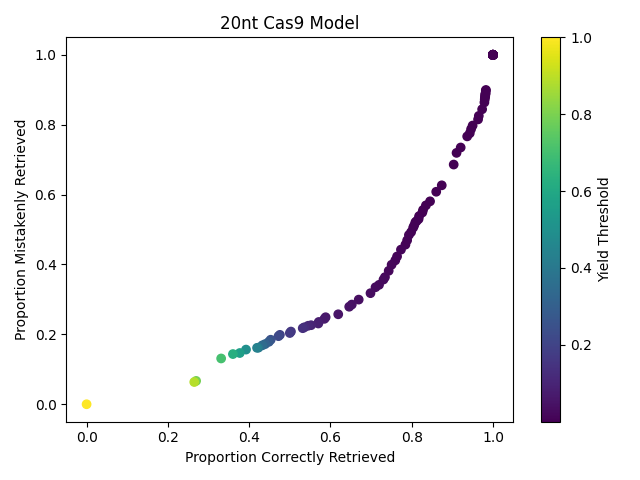

In [128]:
plt.figure()   
plt.scatter(cas20_recall_data, cas20_false_positive_data, c=cas20_thresholds, cmap=plt.cm.viridis)
plt.xlabel("Proportion Correctly Retrieved")
plt.ylabel("Proportion Mistakenly Retrieved")
plt.colorbar(label="Yield Threshold")
plt.title("20nt Cas9 Model")
plt.tight_layout()
plt.savefig('colorbar.png', bbox_inches='tight', dpi=1000)
plt.show()

<IPython.core.display.Javascript object>


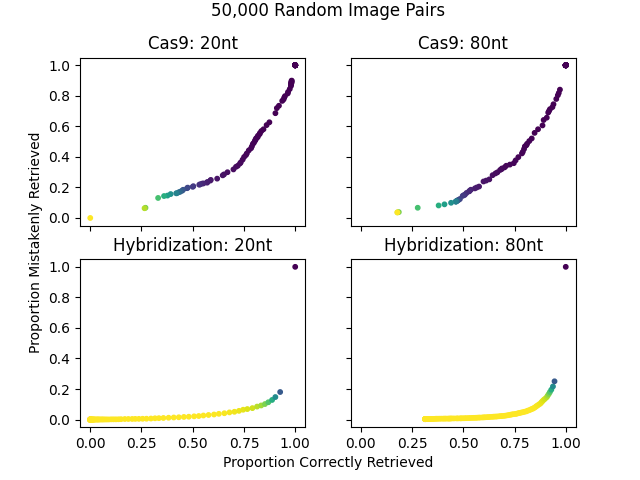

In [129]:
# scales = np.linspace(0, 1, 10)
locs = range(4)
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(0, 1)
pt_size = 10

fig, axes = plt.subplots(2,2, constrained_layout=False, tight_layout=False, sharex=True, sharey=True)

# plot data
sc = axes[0,0].scatter(cas20_recall_data, cas20_false_positive_data, c=cas20_thresholds, s=pt_size)
axes[0,0].set_title("Cas9: 20nt")

sc = axes[0,1].scatter(cas80_recall_data, cas80_false_positive_data, c=cas80_thresholds, s=pt_size)
axes[0,1].set_title("Cas9: 80nt")

sc = axes[1,0].scatter(hyb20_recall_data, hyb20_false_positive_data, c=hyb20_thresholds, s=pt_size)
axes[1,0].set_title("Hybridization: 20nt")

sc = axes[1,1].scatter(hyb80_recall_data, hyb80_false_positive_data, c=hyb80_thresholds, s=pt_size)
axes[1,1].set_title("Hybridization: 80nt")

# set up color bar
# sm =  ScalarMappable(norm=norm, cmap=cmap)
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=axes[:,1], pad=.1)
# cbar.ax.set_title("Yield Threshold", rotation=270)

# labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title('50,000 Random Image Pairs', pad=30)
plt.xlabel("Proportion Correctly Retrieved")
plt.ylabel("Proportion Mistakenly Retrieved")
plt.savefig('50k_random_pairs_4plots.png', bbox_inches='tight', dpi=1000)
plt.show()